# Table of contents

* [Load components tables from 2020 and 2017](#load)
* [Cross checking the content of the 2020 and 2017 models](#crosschecks)
* [Comparing the full distributions](#fullpdfcomparison)




# Load appropriate modules

In [56]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts


In [57]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [110]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood
import nEXOMaterialsDBInterface

import importlib
importlib.reload( nEXOMaterialsDBInterface )
importlib.reload( nEXOFitWorkspace )
importlib.reload( nEXOFitModel )

<module 'nEXOFitModel' from '../../modules/nEXOFitModel.py'>

<a class="anchor" id="load"></a>

# Load components tables from both 2020 and 2017


In [111]:
workspace2017 = nEXOFitWorkspace.nEXOFitWorkspace(config='../config/TUTORIAL_config.yaml')

optimized_binning_yaml = '/p/vast1/nexo/sensitivity2020/pdfs/config_files/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1.yaml'
workspace2020 = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)


#workspace2017.SetHandlingOfRadioassayData(fluctuate=True)
#workspace2020.SetHandlingOfRadioassayData(fluctuate=True)


In [112]:
workspace2017.LoadComponentsTableFromFile('/usr/workspace/wsa/nexo/lenardo1/baseline2017_components_table/ComponentsTable_D-005_Baseline2017_FromTutorial.h5')

optimized_binning_components_table = '/p/vast1/nexo/sensitivity2020/pdfs/component_tables/ComponentsTable_D-023_Optimized_DNN_Standoff_Binning_version1.h5'
workspace2020.LoadComponentsTableFromFile(optimized_binning_components_table)



Loading input data froma previously-generated components table....

Loaded dataframe with 152 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['SS/MS', 'Energy (keV)', 'Standoff (mm)']

Loading input data froma previously-generated components table....

Loaded dataframe with 171 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']


In [113]:
workspace2017.df_components.head()

,PDFName,Component,Isotope,MC ID,Total Mass or Area,Activity ID,SpecActiv,SpecActivErr,SpecActivErrorType,RawActiv,RawActivErr,TotalHitEff_N,Histogram,HistogramAxisNames,TotalHitEff_K,Group,Expected Counts
0,U238_OuterCryostatSupportResin,Outer Cryostat Support (Resin),U-238,MC-089,345.0,R-016.3.4.1,-0.0229,0.0581,Symmetric error (68% C.L.),-7.9005,20.0445,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",1527.000000,Far,-3804.523065
1,Th232_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Th-232,MC-089,345.0,R-016.3.4.1,-0.0537,0.0468,Symmetric error (68% C.L.),-18.5265,16.1460,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",4512.880171,Far,-26366.579301
2,K40_OuterCryostatSupportResin,Outer Cryostat Support (Resin),K-40,MC-089,345.0,R-016.3.4.1,-0.3110,0.5810,Symmetric error (68% C.L.),-107.2950,200.4450,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",111.000000,Far,-3755.857183
3,Co60_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Co-60,MC-089,345.0,R-016.3.4.1,-0.0375,0.0168,Symmetric error (68% C.L.),-12.9375,5.7960,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",785.000000,Far,-3202.776450
4,Cs137_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Cs-137,MC-089,345.0,R-016.3.4.1,0.0371,0.0346,Symmetric error (68% C.L.),12.7995,11.9370,0.000000e+00,None,None,0.000000,Off,-1.000000


<a class="anchor" id="crosschecks"></a>

# Cross check the components
We should check to see which components are in one model but not the other, to get an idea of which plots will be missing from the images produced below.

In [93]:
names2020 = workspace2020.df_components['PDFName']
names2017 = workspace2017.df_components['PDFName']

print('Checking 2020 components:')
for index,row in workspace2020.df_components.iterrows():
    name = row['PDFName']
    if np.sum(workspace2017.df_components['PDFName'].str.contains(name)) == 0:
        print('\t{:<40} is contained in 2020 model, but not in 2017'.format(name))
    
print('Checking 2017 components:')
for index,row in workspace2017.df_components.iterrows():
    name = row['PDFName']
    if np.sum(workspace2020.df_components['PDFName'].str.contains(name)) == 0:
        print('\t{:<40} is contained in 2017 model, but not in 2020'.format(name))    
    


Checking 2020 components:
	K40_HVFeedthroughCoreTeflon              is contained in 2020 model, but not in 2017
	Th232_HVFeedthroughCoreTeflon            is contained in 2020 model, but not in 2017
	U238_HVFeedthroughCoreTeflon             is contained in 2020 model, but not in 2017
	U238_ElectricalConnectionsAnode          is contained in 2020 model, but not in 2017
	Th232_ElectricalConnectionsAnode         is contained in 2020 model, but not in 2017
	U238_ElectricalConnectionsSiPM           is contained in 2020 model, but not in 2017
	Th232_ElectricalConnectionsSiPM          is contained in 2020 model, but not in 2017
	U238_HVFeedthroughCoreCable              is contained in 2020 model, but not in 2017
	Th232_HVFeedthroughCoreCable             is contained in 2020 model, but not in 2017
	K40_HVFeedthroughCoreCable               is contained in 2020 model, but not in 2017
	U238_HVFeedthroughCoreConductivePE       is contained in 2020 model, but not in 2017
	Th232_HVFeedthroughCoreCond

### Conclusions

I think we don't need to worry about it. Everything in the 2017 model is contained in the 2020 model except the solder, which we plan to not use in favor of the gold wire bonds (which are denoted as "electrical connections").

Note that despite the fact that "HVCables" shows up as not included in the 2020 model, this is just a quirk of the  `contains` function. In the 2020 model it's called "HVCable", so it gets mistakenly flagged here.


<a class="anchor" id="fullpdfcomparison"></a>
# Make comparison plots for the full detector



Cs137_OuterCryostatSupportResin has no histogram
Cs137_OuterCryostatSupportFiber has no histogram
Cs137_OuterCryostatResin has no histogram
Cs137_OuterCryostatFiber has no histogram
Cs137_InnerCryostatSupportResin has no histogram
Cs137_InnerCryostatSupportFiber has no histogram
Cs137_InnerCryostatResin has no histogram
Cs137_InnerCryostatFiber has no histogram
Cs137_HVTubes has no histogram
Cs137_HVFeedthrough has no histogram
There are 0 entries in the 2017 model matching K40_HVFeedthroughCoreTeflon
There are 0 entries in the 2017 model matching Th232_HVFeedthroughCoreTeflon
There are 0 entries in the 2017 model matching U238_HVFeedthroughCoreTeflon
Cs137_HVPlunger has no histogram
Cs137_CalibrationGuideTube1 has no histogram
Cs137_CalibrationGuideTube2 has no histogram
Cs137_TPCSupportCone has no histogram
Cs137_TPCVessel has no histogram
Cs137_Bulge has no histogram
Cs137_SiPMStaves has no histogram
Cs137_ChargeTilesSupport has no histogram
Xe137_FullLXe has no histogram
There are 

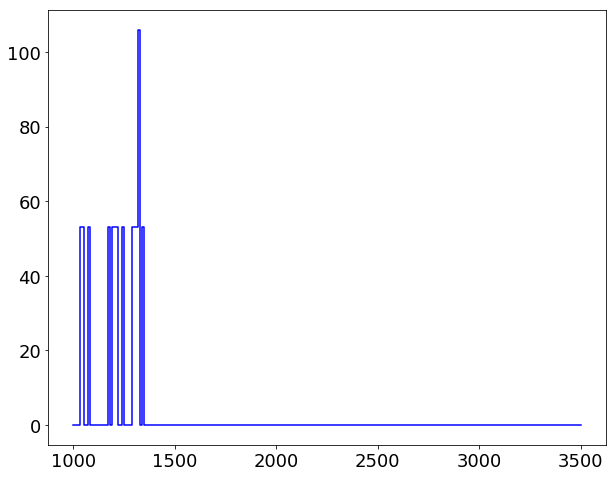

In [78]:
pdf = PdfPages('AllPDFs_EnergyProjection_WeightedByRadioassay.pdf')


for index, row in workspace2020.df_components.iterrows():
      
    plt.clf()
    
    if row['Histogram'] is None:
        print('{} has no histogram'.format(row['PDFName']))
        continue
    
    # Grab and plot the 2020 histogram
    hist2020 = row['Histogram'].normalize( (0,1,2), integrate=False ) *\
                row['Expected Counts']
    if row['Expected Counts'] < 0.: 
        hist2020 = hist2020*(-1.)
        histlabel = '2020 model (inverted)'
    else:
        histlabel = '2020 model'
    hl.plot1d( hist2020.project([1]), color='b',label=histlabel)
    
    
    # Get the row in the 2017 model with a matching PDFName
    mask2017 = workspace2017.df_components['PDFName'] == row['PDFName']
    idx_list = np.where(mask2017)[0]
    if len(idx_list) != 1:
        print('There are {} entries in the 2017 model matching {}'.format(len(idx_list),row['PDFName']))
        continue
    idx = idx_list[0]
    row2017 = workspace2017.df_components.iloc[idx]
    
    # If there is a match, make the 2017 hist.
    if np.sum(mask2017) > 0:
        hist2017 = row2017['Expected Counts'] * \
                row2017['Histogram'].normalize( (0,1,2), integrate=False )
        #print(hist2017)
        if row2017['Expected Counts'] < 0.: 
            hist2017 = hist2017*(-1.)
            histlabel = '2017 model (inverted)'
        else:
            histlabel = '2017 model'
        hl.plot1d(hist2017.project([1]),color='g',label=histlabel)
        
        hit_eff_2020 = np.sum(row['Histogram'].values) / row['TotalHitEff_N']
        hit_eff_2017 = np.sum(row2017['Histogram'].values) / row['TotalHitEff_N']
        
        label_text = '{:<15} {:^8}  {:^8}\n'.format(' ','2019','2017') + \
                '{:<15} {:^8.6}  {:^8.6}  mBq/kg\n'.format('SpecActivity:',row['SpecActiv'],row2017['SpecActiv']) +\
                '{:<15} {:^8.6}  {:^8.6}  kg\n'.format('Mass:',row['Total Mass or Area'],row2017['Total Mass or Area']) +\
                '{:<15} {:^8.6}  {:^8.6}  evts\n'.format('TotalHitEff_N:',row['TotalHitEff_N'],row2017['TotalHitEff_N']) +\
                '{:<15} {:^8.3}  {:^8.3}  \n'.format('Total hit eff:',hit_eff_2020,hit_eff_2017) + \
                '{:<15} {:^8.3}  {:^8.3}  counts\n'.format('Expected cts:',row['Expected Counts'],row2017['Expected Counts'])+\
                '{:<15} {:^9} {:^9}'.format('Group:',row['Group'],row2017['Group'])
        
        label_box_props = dict(alpha=0.7,facecolor=(1.,1.,1.),edgecolor=(0.,0.,0.))
        plt.text(0.5,0.8,label_text,fontsize=10,transform=plt.gca().transAxes,fontfamily='monospace',bbox=label_box_props)
        
    plt.legend(loc='lower left')
    plt.title(row['PDFName'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts in 10yr livetime')
    pdf.savefig( plt.gcf() )
    
pdf.close()


### Conclusions

The hit efficiency here is a bit misleading, since the 2017 model extends down to lower energies. Let's start by slicing the histograms so that the 2017 model spans the same energy space.

# Making slices

This is a bit awkward because the slicing functionality is only written into the `nEXOFitModel` module. So, we create a model where each component gets its own group. However, we want to preserve the group information as well, so we'll store that in a dict.

In [114]:
groupdict2017 = {}
groupdict2020 = {}


# Give each component its own group
for index, row in workspace2017.df_components.iterrows():
    if row['Histogram'] is None:
        continue
    groupdict2017[row['PDFName']] = row['Group']
    workspace2017.df_components.loc[index,'Group'] = row['PDFName']

# Give each component its own group
for index, row in workspace2020.df_components.iterrows():
    if row['Histogram'] is None:
        continue
    groupdict2020[row['PDFName']] = row['Group']
    workspace2020.df_components.loc[index,'Group'] = row['PDFName']

In [115]:
workspace2017.df_components.head(n=50)


,PDFName,Component,Isotope,MC ID,Total Mass or Area,Activity ID,SpecActiv,SpecActivErr,SpecActivErrorType,RawActiv,RawActivErr,TotalHitEff_N,Histogram,HistogramAxisNames,TotalHitEff_K,Group,Expected Counts
0,U238_OuterCryostatSupportResin,Outer Cryostat Support (Resin),U-238,MC-089,345.0,R-016.3.4.1,-0.022900,0.058100,Symmetric error (68% C.L.),-7.900500,20.044500,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",1.527000e+03,U238_OuterCryostatSupportResin,-3.804523e+03
1,Th232_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Th-232,MC-089,345.0,R-016.3.4.1,-0.053700,0.046800,Symmetric error (68% C.L.),-18.526500,16.146000,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",4.512880e+03,Th232_OuterCryostatSupportResin,-2.636658e+04
2,K40_OuterCryostatSupportResin,Outer Cryostat Support (Resin),K-40,MC-089,345.0,R-016.3.4.1,-0.311000,0.581000,Symmetric error (68% C.L.),-107.295000,200.445000,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",1.110000e+02,K40_OuterCryostatSupportResin,-3.755857e+03
3,Co60_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Co-60,MC-089,345.0,R-016.3.4.1,-0.037500,0.016800,Symmetric error (68% C.L.),-12.937500,5.796000,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",7.850000e+02,Co60_OuterCryostatSupportResin,-3.202776e+03
4,Cs137_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Cs-137,MC-089,345.0,R-016.3.4.1,0.037100,0.034600,Symmetric error (68% C.L.),12.799500,11.937000,0.000000e+00,None,None,0.000000e+00,Off,-1.000000e+00
5,U238_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),U-238,MC-089,345.0,R-017.3.3.1,0.501000,0.191000,Symmetric error (68% C.L.),172.845000,65.895000,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",1.527000e+03,U238_OuterCryostatSupportFiber,8.323433e+04
6,Th232_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),Th-232,MC-089,345.0,R-017.3.3.1,0.300000,0.157000,Symmetric error (68% C.L.),103.500000,54.165000,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",4.512880e+03,Th232_OuterCryostatSupportFiber,1.472993e+05
7,K40_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),K-40,MC-089,345.0,R-017.3.3.1,25.200000,3.000000,Symmetric error (68% C.L.),8694.000000,1035.000000,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",1.110000e+02,K40_OuterCryostatSupportFiber,3.043331e+05
8,Co60_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),Co-60,MC-089,345.0,R-017.3.3.1,-0.006900,0.066900,Symmetric error (68% C.L.),-2.380500,23.080500,1.000000e+09,"Hist(2 bins in [0,2], 280 bins in [700.0,3500....","[SS/MS, Energy (keV), Standoff (mm)]",7.850000e+02,Co60_OuterCryostatSupportFiber,-5.893109e+02
9,Cs137_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),Cs-137,MC-089,345.0,R-017.3.3.1,0.621000,0.231000,Symmetric error (68% C.L.),214.245000,79.695000,0.000000e+00,None,None,0.000000e+00,Off,-1.000000e+00


In [116]:
workspace2020.df_components.head(n=50)

,PDFName,Component,Isotope,MC ID,Total Mass or Area,Activity ID,SpecActiv,SpecActivErr,SpecActivErrorType,RawActiv,RawActivErr,TotalHitEff_N,Histogram,HistogramAxisNames,TotalHitEff_K,Group,Expected Counts
0,U238_OuterCryostatSupportResin,Outer Cryostat Support (Resin),U-238,MC-367,345.0,R-016.3.4.1,-0.022900,0.058100,Symmetric error (68% C.L.),-7.900500,20.044500,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",4.545454e+01,U238_OuterCryostatSupportResin,-1.132501e+02
1,Th232_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Th-232,MC-367,345.0,R-016.3.4.1,-0.053700,0.046800,Symmetric error (68% C.L.),-18.526500,16.146000,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",1.388832e+02,Th232_OuterCryostatSupportResin,-8.114278e+02
2,K40_OuterCryostatSupportResin,Outer Cryostat Support (Resin),K-40,MC-367,345.0,R-016.3.4.1,-0.311000,0.581000,Symmetric error (68% C.L.),-107.295000,200.445000,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",1.259446e+00,K40_OuterCryostatSupportResin,-4.261530e+01
3,Co60_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Co-60,MC-367,345.0,R-016.3.4.1,-0.037500,0.016800,Symmetric error (68% C.L.),-12.937500,5.796000,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",5.242464e+00,Co60_OuterCryostatSupportResin,-2.138910e+01
4,Cs137_OuterCryostatSupportResin,Outer Cryostat Support (Resin),Cs-137,MC-367,345.0,R-016.3.4.1,0.037100,0.034600,Symmetric error (68% C.L.),12.799500,11.937000,0.000000e+00,None,None,0.000000e+00,Off,-1.000000e+00
5,U238_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),U-238,MC-367,345.0,R-017.3.3.1,0.501000,0.191000,Symmetric error (68% C.L.),172.845000,65.895000,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",4.545454e+01,U238_OuterCryostatSupportFiber,2.477654e+03
6,Th232_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),Th-232,MC-367,345.0,R-017.3.3.1,0.300000,0.157000,Symmetric error (68% C.L.),103.500000,54.165000,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",1.388832e+02,Th232_OuterCryostatSupportFiber,4.533116e+03
7,K40_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),K-40,MC-367,345.0,R-017.3.3.1,25.200000,3.000000,Symmetric error (68% C.L.),8694.000000,1035.000000,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",1.259446e+00,K40_OuterCryostatSupportFiber,3.453073e+03
8,Co60_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),Co-60,MC-367,345.0,R-017.3.3.1,-0.006900,0.066900,Symmetric error (68% C.L.),-2.380500,23.080500,1.000000e+09,"Hist(14 bins in [0.0,1.0], 250 bins in [1000.0...","[DNN, Energy (keV), Standoff (mm)]",5.242464e+00,Co60_OuterCryostatSupportFiber,-3.935594e+00
9,Cs137_OuterCryostatSupportFiber,Outer Cryostat Support (Fiber),Cs-137,MC-367,345.0,R-017.3.3.1,0.621000,0.231000,Symmetric error (68% C.L.),214.245000,79.695000,0.000000e+00,None,None,0.000000e+00,Off,-1.000000e+00


In [117]:
workspace2017.CreateGroupedPDFs()
workspace2020.CreateGroupedPDFs()

model2017 = nEXOFitModel.nEXOFitModel()
model2020 = nEXOFitModel.nEXOFitModel()





Creating grouped PDFs....
no sigma for Rn222_CathodeRadon (R-088.1.1.1)
no sigma for Rn222_ActiveLXe (R-088.2.1.1)
no sigma for Rn222_InactiveLXe (R-088.3.1.1)
	Group:                              	Expected Counts:
	U238_OuterCryostatSupportResin      	         2.2438
	Th232_OuterCryostatSupportResin     	         1.4344
	K40_OuterCryostatSupportResin       	         1.3130
	Co60_OuterCryostatSupportResin      	         0.0064
	U238_OuterCryostatSupportFiber      	        83.2774
	Th232_OuterCryostatSupportFiber     	       148.1276
	K40_OuterCryostatSupportFiber       	       304.3329
	Co60_OuterCryostatSupportFiber      	         1.9969
	U238_OuterCryostatResin             	         8.7802
	Th232_OuterCryostatResin            	         5.6129
	K40_OuterCryostatResin              	         5.1378
	Co60_OuterCryostatResin             	         0.0250
	U238_OuterCryostatFiber             	       325.8681
	Th232_OuterCryostatFiber            	       579.6299
	K40_OuterCryostatFiber     

In [118]:

model2017 = nEXOFitModel.nEXOFitModel()
model2020 = nEXOFitModel.nEXOFitModel()

model2017.AddPDFsFromDataframe(workspace2017.df_group_pdfs,\
                               workspace2017.histogram_axis_names)
model2017.GenerateModelDistribution()
model2020.AddPDFsFromDataframe(workspace2020.df_group_pdfs,\
                               workspace2020.histogram_axis_names)
model2020.GenerateModelDistribution()



Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 65271573.139914066, 8383 empty bins, and 0 non-finite values)

## All events, but cutting <1000 keV in 2017 model (normalized by area)

Num_U238_OuterCryostatSupportResin
Num_Th232_OuterCryostatSupportResin
Num_K40_OuterCryostatSupportResin
Num_Co60_OuterCryostatSupportResin
Num_U238_OuterCryostatSupportFiber
Num_Th232_OuterCryostatSupportFiber
Num_K40_OuterCryostatSupportFiber
Num_Co60_OuterCryostatSupportFiber
Num_U238_OuterCryostatResin
Num_Th232_OuterCryostatResin
Num_K40_OuterCryostatResin
Num_Co60_OuterCryostatResin
Num_U238_OuterCryostatFiber
Num_Th232_OuterCryostatFiber
Num_K40_OuterCryostatFiber
Num_Co60_OuterCryostatFiber
Num_U238_InnerCryostatSupportResin
Num_Th232_InnerCryostatSupportResin
Num_K40_InnerCryostatSupportResin
Num_Co60_InnerCryostatSupportResin
Num_U238_InnerCryostatSupportFiber
Num_Th232_InnerCryostatSupportFiber
Num_K40_InnerCryostatSupportFiber
Num_Co60_InnerCryostatSupportFiber
Num_U238_InnerCryostatResin
Num_Th232_InnerCryostatResin
Num_K40_InnerCryostatResin
Num_Co60_InnerCryostatResin
Num_U238_InnerCryostatFiber
Num_Th232_InnerCryostatFiber
Num_K40_InnerCryostatFiber
Num_Co60_InnerCryost

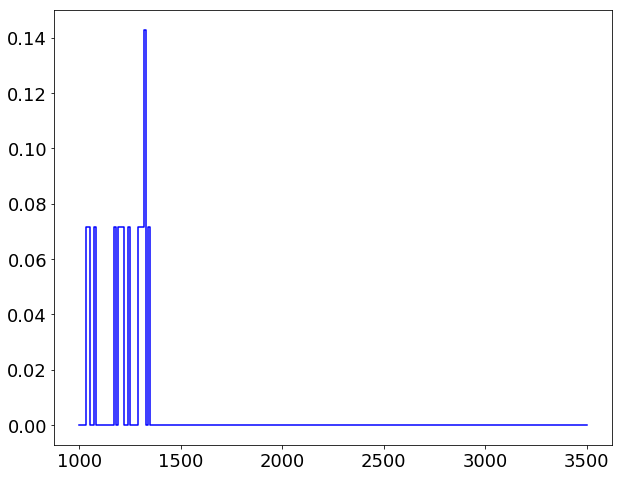

In [158]:
# Renormalized

cut_dict_2017 = {'SS/MS': [0.,2.],
                         'Energy (keV)': (1000.,3500.),
                         'Standoff (mm)': (0.,650.)
                        }
cut_dict_2020 = {'DNN': (0.,1.),
               'Energy (keV)': (1000.,3500.),
               'Standoff (mm)': (0.,650.)
              }

pdf = PdfPages('PDFs_FullDist_EnergyProjection_NormalizedByArea.pdf')

i=0
for row in model2020.variable_list:
    print(row['Name'])
    
#     if row['Value'] < 0.001:
#         continue

    plt.clf()
    
    
    idx2020 = model2020.GetVariableIndexByName(row['Name'])
    hist2020 = model2020.GetSlicedDistribution( cut_dict=cut_dict_2020, \
                                               renormalize=True, \
                                               var_name=row['Name'],\
                                              verbose=False)
    if row['Value'] < 0.: hist2020 = hist2020*(-1.)
    hl.plot1d( hist2020.project([1]), color='b',label='2020 model')
    
    
    try:
        idx2017 = model2017.GetVariableIndexByName(row['Name'])
    except ValueError:
        print('\tWARNING: No variable in the 2017 model contins the name {}'.format(row['Name']))
        continue

    row2017 = model2017.variable_list[idx2017]


    hist2017 = model2017.GetSlicedDistribution( cut_dict=cut_dict_2017, \
                                               renormalize=True,\
                                              var_name=row['Name'],\
                                              verbose=False)
    if row2017['Value'] < 0.: 
        hist2017 = hist2017*(-1.)
    hl.plot1d(hist2017.project([1]),color='g',label='2017 model')

    plt.legend(loc='lower left')
    plt.title(row['Name'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts, normalized by area')
    pdf.savefig( plt.gcf() )
    
    i+=1
    
pdf.close()





## All events, but cutting <1000 keV in 2017 model weighted by radioassay values

Num_U238_OuterCryostatSupportResin
Num_Th232_OuterCryostatSupportResin
Num_K40_OuterCryostatSupportResin
Num_Co60_OuterCryostatSupportResin
Num_U238_OuterCryostatSupportFiber
Num_Th232_OuterCryostatSupportFiber
Num_K40_OuterCryostatSupportFiber
Num_Co60_OuterCryostatSupportFiber
Num_U238_OuterCryostatResin
Num_Th232_OuterCryostatResin
Num_K40_OuterCryostatResin
Num_Co60_OuterCryostatResin
Num_U238_OuterCryostatFiber
Num_Th232_OuterCryostatFiber
Num_K40_OuterCryostatFiber
Num_Co60_OuterCryostatFiber
Num_U238_InnerCryostatSupportResin
Num_Th232_InnerCryostatSupportResin
Num_K40_InnerCryostatSupportResin
Num_Co60_InnerCryostatSupportResin
Num_U238_InnerCryostatSupportFiber
Num_Th232_InnerCryostatSupportFiber
Num_K40_InnerCryostatSupportFiber
Num_Co60_InnerCryostatSupportFiber
Num_U238_InnerCryostatResin
Num_Th232_InnerCryostatResin
Num_K40_InnerCryostatResin
Num_Co60_InnerCryostatResin
Num_U238_InnerCryostatFiber
Num_Th232_InnerCryostatFiber
Num_K40_InnerCryostatFiber
Num_Co60_InnerCryost

/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


No variable contins the name Num_Th232_OuterCryostatWTSupport
Num_U238_InnerCryostatFeedthrough
No variable contins the name Num_U238_InnerCryostatFeedthrough
Num_Th232_InnerCryostatFeedthrough
No variable contins the name Num_Th232_InnerCryostatFeedthrough
Num_K40_InnerCryostatFeedthrough
No variable contins the name Num_K40_InnerCryostatFeedthrough
Num_Co60_InnerCryostatFeedthrough
No variable contins the name Num_Co60_InnerCryostatFeedthrough
Num_U238_RepeaterBoxShell
No variable contins the name Num_U238_RepeaterBoxShell
Num_Th232_RepeaterBoxShell
No variable contins the name Num_Th232_RepeaterBoxShell
Num_K40_RepeaterBoxShell
No variable contins the name Num_K40_RepeaterBoxShell
Num_Co60_RepeaterBoxShell
No variable contins the name Num_Co60_RepeaterBoxShell
Num_U238_RepeaterBoxElectronics
No variable contins the name Num_U238_RepeaterBoxElectronics
Num_Th232_RepeaterBoxElectronics
No variable contins the name Num_Th232_RepeaterBoxElectronics
Num_K40_RepeaterBoxElectronics
No vari

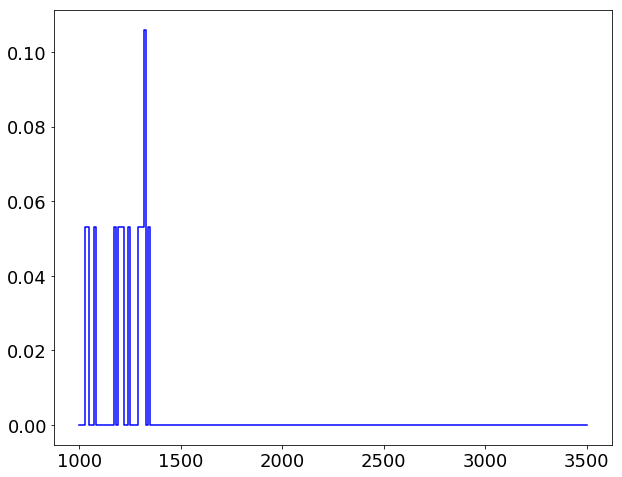

In [155]:
cut_dict_2017 = {'SS/MS': [0.,2.],
                         'Energy (keV)': (1000.,3500.),
                         'Standoff (mm)': (0.,650.)
                        }
cut_dict_2020 = {'DNN': (0.,1.),
               'Energy (keV)': (1000.,3500.),
               'Standoff (mm)': (0.,650.)
              }

pdf = PdfPages('PDFs_FullDist_EnergyProjection_WeightedByRadioassay.pdf')

i=0
for row in model2020.variable_list:
    print(row['Name'])
    
#     if row['Value'] < 0.001:
#         continue

    plt.clf()
    
    ##### DO THE STUFF FOR THE 2020 MODEL ######
    idx2020 = model2020.GetVariableIndexByName(row['Name'])
    hist2020 = model2020.GetSlicedDistribution( cut_dict=cut_dict_2020, \
                                               renormalize=False, \
                                               var_name=row['Name'],\
                                              verbose=False) * row['Value']
    ratio_slice_to_full_2020 = np.sum(hist2020.values/row['Value'])/np.sum(model2020.pdfs[idx2020].values)
    #print('Ratio of slice to full for 2020: {:4.4}\n'.format(ratio_slice_to_full))
    
    if row['Value'] < 0.: hist2020 = hist2020*(-1.)
    hl.plot1d( hist2020.project([1]), color='b',label='2020 model')
    
    # Get the correct row from the df_components to calculate the correct hit efficiency
    mask = workspace2020.df_components['PDFName'] == row['Name'][4:]
    components_row_2020 = workspace2020.df_components.loc[mask].iloc[0]
    
    
    
    
    ##### DO THE STUFF FOR THE 2017 MODEL ######
    try:
        idx2017 = model2017.GetVariableIndexByName(row['Name'])
    except ValueError:
        print('No variable contins the name {}'.format(row['Name']))
        continue

    row2017 = model2017.variable_list[idx2017]


    hist2017 = model2017.GetSlicedDistribution( cut_dict=cut_dict_2017, \
                                               renormalize=False,\
                                              var_name=row['Name'],\
                                              verbose=False) * row2017['Value']
    ratio_slice_to_full_2017 = np.sum(hist2017.values/row2017['Value'])/np.sum(model2017.pdfs[idx2017].values)
    #print('Ratio of slice to full for 2017: {:4.4}\n'.format(ratio_slice_to_full_2017))

    if row2017['Value'] < 0.: hist2017 = hist2017*(-1.)
    hl.plot1d(hist2017.project([1]),color='g',label='2017 model')
    
    # Get the correct row from the df_components to calculate the correct hit efficiency
    mask = workspace2017.df_components['PDFName'] == row['Name'][4:]
    components_row_2017 = workspace2017.df_components.loc[mask].iloc[0]
    
    
    hit_eff_2020 = np.sum(components_row_2020['Histogram'].values) / components_row_2020['TotalHitEff_N'] * \
                    ratio_slice_to_full_2020
    hit_eff_2017 = np.sum(components_row_2017['Histogram'].values) / components_row_2017['TotalHitEff_N'] * \
                    ratio_slice_to_full_2017

    label_text = '{:<15} {:^8}  {:^8}\n'.format(' ','2019','2017') + \
            '{:<15} {:^8.6}  {:^8.6}  mBq/kg\n'.format('SpecActivity:',\
                                    components_row_2020['SpecActiv'],components_row_2017['SpecActiv']) +\
            '{:<15} {:^8.6}  {:^8.6}  kg\n'.format('Mass:',\
                                    components_row_2020['Total Mass or Area'],components_row_2017['Total Mass or Area']) +\
            '{:<15} {:^8.6}  {:^8.6}  evts\n'.format('TotalHitEff_N:',\
                                    components_row_2020['TotalHitEff_N'],components_row_2017['TotalHitEff_N']) +\
            '{:<15} {:^8.3}  {:^8.3}  \n'.format('Hit efficiency:',\
                                    hit_eff_2020,hit_eff_2017) + \
            '{:<15} {:^8.3}  {:^8.3}  counts'.format('Expected cts:',\
                                    row['Value']*ratio_slice_to_full_2020,row2017['Value']*ratio_slice_to_full_2017)

    label_box_props = dict(alpha=0.7,facecolor=(1.,1.,1.),edgecolor=(0.,0.,0.))
    plt.text(0.5,0.8,label_text,fontsize=10,transform=plt.gca().transAxes,fontfamily='monospace',bbox=label_box_props)

    plt.legend(loc='lower left')
    plt.title(row['Name'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts in 10yr livetime')
    pdf.savefig( plt.gcf() )
    
    i+=1
    
pdf.close()


## All events in ROI weighted by radioassay values

Num_U238_OuterCryostatSupportResin
2020 model (1000-3500 keV):
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    120.0,    650.0
2020 model (ROI):
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input cut boundaries:    2434.7,   2480.9
	Actual ROI boundaries:   2440.0,   2480.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    120.0,    650.0
2017 model (1000-3500 keV):
SS/MS:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    104.0,    650.0
2020 model (R

No variable contins the name Num_K40_OuterCryostatLiner
Num_Co60_OuterCryostatLiner
No variable contins the name Num_Co60_OuterCryostatLiner
Num_U238_OuterCryostatWTSupport
No variable contins the name Num_U238_OuterCryostatWTSupport
Num_Th232_OuterCryostatWTSupport
No variable contins the name Num_Th232_OuterCryostatWTSupport
Num_U238_InnerCryostatFeedthrough
No variable contins the name Num_U238_InnerCryostatFeedthrough
Num_Th232_InnerCryostatFeedthrough
No variable contins the name Num_Th232_InnerCryostatFeedthrough
Num_K40_InnerCryostatFeedthrough


/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


No variable contins the name Num_K40_InnerCryostatFeedthrough
Num_Co60_InnerCryostatFeedthrough
No variable contins the name Num_Co60_InnerCryostatFeedthrough
Num_U238_RepeaterBoxShell
No variable contins the name Num_U238_RepeaterBoxShell
Num_Th232_RepeaterBoxShell
No variable contins the name Num_Th232_RepeaterBoxShell
Num_K40_RepeaterBoxShell
No variable contins the name Num_K40_RepeaterBoxShell
Num_Co60_RepeaterBoxShell
No variable contins the name Num_Co60_RepeaterBoxShell
Num_U238_RepeaterBoxElectronics
No variable contins the name Num_U238_RepeaterBoxElectronics
Num_Th232_RepeaterBoxElectronics
No variable contins the name Num_Th232_RepeaterBoxElectronics
Num_K40_RepeaterBoxElectronics
No variable contins the name Num_K40_RepeaterBoxElectronics
Num_Co60_RepeaterBoxElectronics
No variable contins the name Num_Co60_RepeaterBoxElectronics


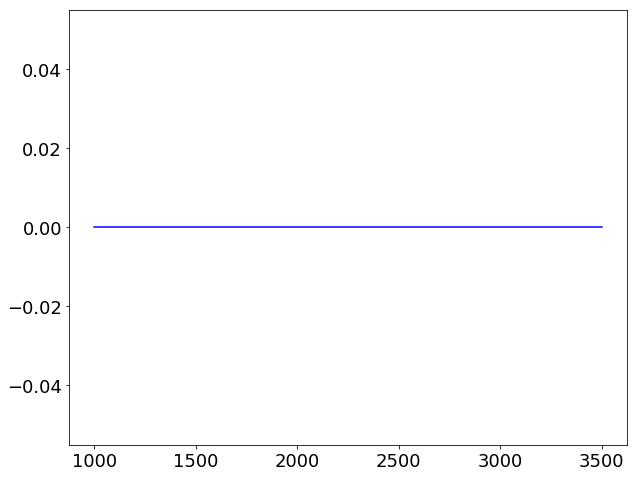

In [156]:
ss_2ton_cut_dict_2017 = {'SS/MS': [0.,1.],
                         'Energy (keV)': (1000.,3500.),
                         'Standoff (mm)': (104.,650.)
                        }
roi_dict_2017 = {'SS/MS': [0.,1.],
                         'Energy (keV)': (2458.07-28.94,2458.07+28.94),
                         'Standoff (mm)': (104.,650.)
                }

ss_2ton_cut_dict_2020 = {'DNN': (0.85,1.),
               'Energy (keV)': (1000.,3500.),
               'Standoff (mm)': (104.,650.)
              }
roi_dict_2020 = {'DNN': (0.85,1.),
               'Energy (keV)': (2434.7,2480.95),
               'Standoff (mm)': (104.,650.)
              }

pdf = PdfPages('PDFs_SSInner2t_EnergyProjection_WeightedByRadioassay.pdf')

i=0
for row in model2020.variable_list:
    print(row['Name'])
    
#     if row['Value'] < 0.001:
#         continue

    plt.clf()
    
    if i==0:
        verbosity = True
    else:
        verbosity = False
    
    ##### DO THE STUFF FOR THE 2020 MODEL ######
    idx2020 = model2020.GetVariableIndexByName(row['Name'])
    if verbosity:
        print('2020 model (1000-3500 keV):')
    hist2020 = model2020.GetSlicedDistribution( cut_dict=ss_2ton_cut_dict_2020, \
                                               renormalize=False, \
                                               var_name=row['Name'],\
                                              verbose=verbosity) * row['Value']
    ratio_slice_to_full_2020 = np.sum(hist2020.values/row['Value'])/np.sum(model2020.pdfs[idx2020].values)
    
    if verbosity:
        print('2020 model (ROI):')
    roi_hist2020 = model2020.GetSlicedDistribution(cut_dict=roi_dict_2020,\
                                                   renormalize=False,\
                                                   var_name=row['Name'],\
                                                   verbose=verbosity)
    ratio_roi_to_full_2020 = np.sum(roi_hist2020.values)/np.sum(model2020.pdfs[idx2020].values)
    #print('Ratio of slice to full for 2020: {:4.4}\n'.format(ratio_slice_to_full))
    
    if row['Value'] < 0.: hist2020 = hist2020*(-1.)
    hl.plot1d( hist2020.project([1]), color='b',label='2020 model')
    
    # Get the correct row from the df_components to calculate the correct hit efficiency
    mask = workspace2020.df_components['PDFName'] == row['Name'][4:]
    components_row_2020 = workspace2020.df_components.loc[mask].iloc[0]
    
    
    
    
    ##### DO THE STUFF FOR THE 2017 MODEL ######
    try:
        idx2017 = model2017.GetVariableIndexByName(row['Name'])
    except ValueError:
        print('No variable contins the name {}'.format(row['Name']))
        continue

    row2017 = model2017.variable_list[idx2017]


    if verbosity:
        print('2017 model (1000-3500 keV):')
    hist2017 = model2017.GetSlicedDistribution( cut_dict=ss_2ton_cut_dict_2017, \
                                               renormalize=False,\
                                              var_name=row['Name'],\
                                              verbose=verbosity) * row2017['Value']
    ratio_slice_to_full_2017 = np.sum(hist2017.values/row2017['Value'])/np.sum(model2017.pdfs[idx2017].values)
    if verbosity:
        print('2020 model (ROI):')
    roi_hist2017 = model2017.GetSlicedDistribution(cut_dict=roi_dict_2017,\
                                                   renormalize=False,\
                                                   var_name=row['Name'],\
                                                   verbose=verbosity)
    ratio_roi_to_full_2017 = np.sum(roi_hist2017.values)/np.sum(model2017.pdfs[idx2017].values)
    #print('Ratio of slice to full for 2017: {:4.4}\n'.format(ratio_slice_to_full_2017))

    if row2017['Value'] < 0.: hist2017 = hist2017*(-1.)
    hl.plot1d(hist2017.project([1]),color='g',label='2017 model')
    
    # Get the correct row from the df_components to calculate the correct hit efficiency
    mask = workspace2017.df_components['PDFName'] == row['Name'][4:]
    components_row_2017 = workspace2017.df_components.loc[mask].iloc[0]
    
    
    hit_eff_2020 = np.sum(components_row_2020['Histogram'].values) / components_row_2020['TotalHitEff_N'] * \
                    ratio_slice_to_full_2020
    roi_hit_eff_2020 = np.sum(components_row_2020['Histogram'].values) / components_row_2020['TotalHitEff_N'] * \
                    ratio_roi_to_full_2020
    hit_eff_2017 = np.sum(components_row_2017['Histogram'].values) / components_row_2017['TotalHitEff_N'] * \
                    ratio_slice_to_full_2017
    roi_hit_eff_2017 = np.sum(components_row_2017['Histogram'].values) / components_row_2017['TotalHitEff_N'] * \
                    ratio_roi_to_full_2017

    label_text = '{:<15} {:^8}  {:^8}\n'.format(' ','2019','2017') + \
            '{:<15} {:^8.6}  {:^8.6}  mBq/kg\n'.format('SpecActivity:',\
                                    components_row_2020['SpecActiv'],components_row_2017['SpecActiv']) +\
            '{:<15} {:^8.6}  {:^8.6}  kg\n'.format('Mass:',\
                                    components_row_2020['Total Mass or Area'],components_row_2017['Total Mass or Area']) +\
            '{:<15} {:^8.6}  {:^8.6}  evts\n'.format('TotalHitEff_N:',\
                                    components_row_2020['TotalHitEff_N'],components_row_2017['TotalHitEff_N']) +\
            '{:<15} {:^8.3}  {:^8.3}  \n'.format('Hit efficiency:',\
                                    hit_eff_2020,hit_eff_2017) + \
            '{:<15} {:^8.3}  {:^8.3}  \n'.format('           ROI:',\
                                    roi_hit_eff_2020,roi_hit_eff_2017) + \
            '{:<15} {:^8.3}  {:^8.3}  counts'.format('Expected cts:',\
                                    row['Value']*ratio_slice_to_full_2020,row2017['Value']*ratio_slice_to_full_2017)

    label_box_props = dict(alpha=0.7,facecolor=(1.,1.,1.),edgecolor=(0.,0.,0.))
    plt.text(0.5,0.8,label_text,fontsize=10,transform=plt.gca().transAxes,fontfamily='monospace',bbox=label_box_props)

    plt.legend(loc='lower left')
    plt.title(row['Name'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts in 10yr livetime')
    pdf.savefig( plt.gcf() )
    
    i+=1
    
pdf.close()



## All events in ROI normalized by area

Num_U238_OuterCryostatSupportResin
2020 model (1000-3500 keV):
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    120.0,    650.0
2020 model (ROI):
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input cut boundaries:    2434.7,   2480.9
	Actual ROI boundaries:   2440.0,   2480.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    120.0,    650.0
2017 model (1000-3500 keV):
SS/MS:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    104.0,    650.0
2020 model (R

No variable contins the name Num_U238_OuterCryostatWTSupport
Num_Th232_OuterCryostatWTSupport
No variable contins the name Num_Th232_OuterCryostatWTSupport
Num_U238_InnerCryostatFeedthrough
No variable contins the name Num_U238_InnerCryostatFeedthrough
Num_Th232_InnerCryostatFeedthrough
No variable contins the name Num_Th232_InnerCryostatFeedthrough
Num_K40_InnerCryostatFeedthrough
No variable contins the name Num_K40_InnerCryostatFeedthrough
Num_Co60_InnerCryostatFeedthrough
No variable contins the name Num_Co60_InnerCryostatFeedthrough
Num_U238_RepeaterBoxShell
No variable contins the name Num_U238_RepeaterBoxShell
Num_Th232_RepeaterBoxShell
No variable contins the name Num_Th232_RepeaterBoxShell
Num_K40_RepeaterBoxShell
No variable contins the name Num_K40_RepeaterBoxShell
Num_Co60_RepeaterBoxShell
No variable contins the name Num_Co60_RepeaterBoxShell
Num_U238_RepeaterBoxElectronics
No variable contins the name Num_U238_RepeaterBoxElectronics
Num_Th232_RepeaterBoxElectronics
No var

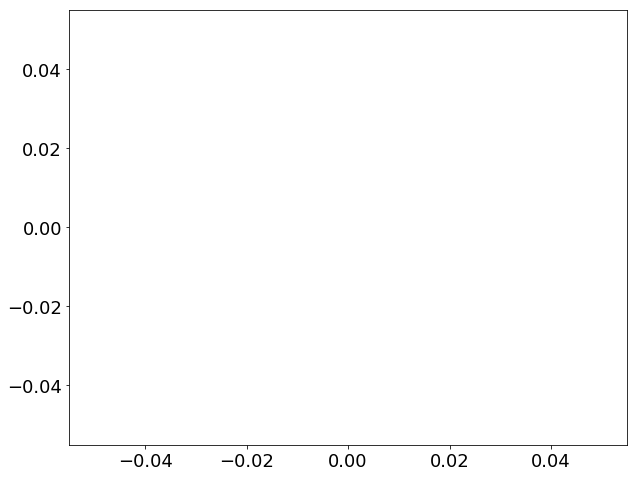

In [157]:
ss_2ton_cut_dict_2017 = {'SS/MS': [0.,1.],
                         'Energy (keV)': (1000.,3500.),
                         'Standoff (mm)': (104.,650.)
                        }
roi_dict_2017 = {'SS/MS': [0.,1.],
                         'Energy (keV)': (2458.07-28.94,2458.07+28.94),
                         'Standoff (mm)': (104.,650.)
                }

ss_2ton_cut_dict_2020 = {'DNN': (0.85,1.),
               'Energy (keV)': (1000.,3500.),
               'Standoff (mm)': (104.,650.)
              }
roi_dict_2020 = {'DNN': (0.85,1.),
               'Energy (keV)': (2434.7,2480.95),
               'Standoff (mm)': (104.,650.)
              }

pdf = PdfPages('PDFs_SSInner2t_EnergyProjection_NormalizedByArea.pdf')

i=0
for row in model2020.variable_list:
    print(row['Name'])
    
#     if row['Value'] < 0.001:
#         continue

    plt.clf()
    
    if i==0:
        verbosity = True
    else:
        verbosity = False
    
    ##### DO THE STUFF FOR THE 2020 MODEL ######
    idx2020 = model2020.GetVariableIndexByName(row['Name'])
    if verbosity:
        print('2020 model (1000-3500 keV):')
    hist2020 = model2020.GetSlicedDistribution( cut_dict=ss_2ton_cut_dict_2020, \
                                               renormalize=True, \
                                               var_name=row['Name'],\
                                              verbose=verbosity)
    ratio_slice_to_full_2020 = np.sum(hist2020.values/row['Value'])/np.sum(model2020.pdfs[idx2020].values)
    
    if verbosity:
        print('2020 model (ROI):')
    roi_hist2020 = model2020.GetSlicedDistribution(cut_dict=roi_dict_2020,\
                                                   renormalize=False,\
                                                   var_name=row['Name'],\
                                                   verbose=verbosity)
    #ratio_roi_to_full_2020 = np.sum(roi_hist2020.values)/np.sum(model2020.pdfs[idx2020].values)
    #print('Ratio of slice to full for 2020: {:4.4}\n'.format(ratio_slice_to_full))
    
    if row['Value'] < 0.: hist2020 = hist2020*(-1.)
    hl.plot1d( hist2020.project([1]), color='b',label='2020 model')
    
    # Get the correct row from the df_components to calculate the correct hit efficiency
    mask = workspace2020.df_components['PDFName'] == row['Name'][4:]
    components_row_2020 = workspace2020.df_components.loc[mask].iloc[0]
    
    
    
    
    ##### DO THE STUFF FOR THE 2017 MODEL ######
    try:
        idx2017 = model2017.GetVariableIndexByName(row['Name'])
    except ValueError:
        print('No variable contins the name {}'.format(row['Name']))
        continue

    row2017 = model2017.variable_list[idx2017]


    if verbosity:
        print('2017 model (1000-3500 keV):')
    hist2017 = model2017.GetSlicedDistribution( cut_dict=ss_2ton_cut_dict_2017, \
                                               renormalize=True,\
                                              var_name=row['Name'],\
                                              verbose=verbosity)
    #ratio_slice_to_full_2017 = np.sum(hist2017.values)/np.sum(model2017.pdfs[idx2017].values)
    if verbosity:
        print('2020 model (ROI):')
    roi_hist2017 = model2017.GetSlicedDistribution(cut_dict=roi_dict_2017,\
                                                   renormalize=False,\
                                                   var_name=row['Name'],\
                                                   verbose=verbosity)
    ratio_roi_to_full_2017 = np.sum(roi_hist2017.values)/np.sum(model2017.pdfs[idx2017].values)
    #print('Ratio of slice to full for 2017: {:4.4}\n'.format(ratio_slice_to_full_2017))

    if row2017['Value'] < 0.: hist2017 = hist2017*(-1.)
    hl.plot1d(hist2017.project([1]),color='g',label='2017 model')
    
    # Get the correct row from the df_components to calculate the correct hit efficiency
    mask = workspace2017.df_components['PDFName'] == row['Name'][4:]
    components_row_2017 = workspace2017.df_components.loc[mask].iloc[0]
    
    
    roi_hit_eff_2020 = np.sum(components_row_2020['Histogram'].values) / components_row_2020['TotalHitEff_N'] * \
                    ratio_roi_to_full_2020
    roi_hit_eff_2017 = np.sum(components_row_2017['Histogram'].values) / components_row_2017['TotalHitEff_N'] * \
                    ratio_roi_to_full_2017

    label_text = '{:<15} {:^8}  {:^8}\n'.format(' ','2019','2017') + \
            '{:<15} {:^8.6}  {:^8.6}  mBq/kg\n'.format('SpecActivity:',\
                                    components_row_2020['SpecActiv'],components_row_2017['SpecActiv']) +\
            '{:<15} {:^8.6}  {:^8.6}  kg\n'.format('Mass:',\
                                    components_row_2020['Total Mass or Area'],components_row_2017['Total Mass or Area']) +\
            '{:<15} {:^8.6}  {:^8.6}  evts\n'.format('TotalHitEff_N:',\
                                    components_row_2020['TotalHitEff_N'],components_row_2017['TotalHitEff_N']) +\
            '{:<15} {:^8.3}  {:^8.3}  \n'.format('Hit eff. in ROI:',\
                                    roi_hit_eff_2020,roi_hit_eff_2017) + \
            '{:<15} {:^8.3}  {:^8.3}  counts'.format('Expected cts:',\
                                    row['Value']*ratio_slice_to_full_2020,row2017['Value']*ratio_slice_to_full_2017)

    label_box_props = dict(alpha=0.7,facecolor=(1.,1.,1.),edgecolor=(0.,0.,0.))
    plt.text(0.5,0.8,label_text,fontsize=10,transform=plt.gca().transAxes,fontfamily='monospace',bbox=label_box_props)

    plt.legend(loc='lower left')
    plt.title(row['Name'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts in 10yr livetime')
    pdf.savefig( plt.gcf() )
    
    i+=1
    
pdf.close()

# Fiducial mass vs. standoff curve





In [20]:
rho = 0.003057/1.e6 # g/cm3
rfsr = 71.85 # mm
dtpc = 1277 # mm
zdrift = 1183 # mm


def fiducial_mass( standoff ):
    return rho * ( np.pi * (dtpc/2 - rfsr - standoff)**2 * (zdrift - 2*standoff) )




(0.0, 650.0)

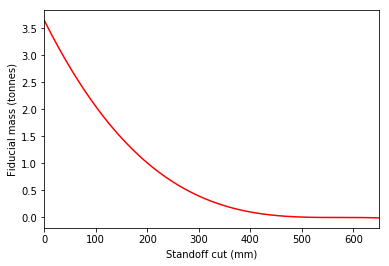

In [21]:
standoffs = np.linspace(0.,650.,200)
masses = fiducial_mass(standoffs)
plt.plot(standoffs,masses,'-r')
plt.ylabel('Fiducial mass (tonnes)')
plt.xlabel('Standoff cut (mm)')
plt.xlim(0.,650.)
#plt.yscale('log')

In [17]:
less_than_2 = np.where(masses < 2.)[0]
print(less_than_2)
print('Standoff at 2t = {:4.4}'.format(standoffs[less_than_2[0]]))

[ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199]
Standoff at 2t = 104.5


In [142]:
(2434.7 + 2480.95)/2.

2457.825

In [146]:
2458.07*0.01*2.355/2.

28.943774250000004

In [147]:
2458.07*0.008*2.355/2.

23.1550194